<h1>But du projet</h1>

<b>Un 'defaut' se produit lorsqu'un emprunteur est incapable d'effectuer des paiements en temps opportun, manque des paiements ou évite ou arrête de faire des paiements sur les intérêts ou le principal dû. Des défauts de paiement peuvent survenir sur une dette garantie, comme un prêt hypothécaire garanti par une maison, ou une dette non garantie comme des cartes de crédit ou un prêt étudiant.</b>

<b>La banque a donc du bénéfice et de l'interet a prédire les futurs manquement de payement pour minimiser leur perte et maximiser leur gains.</b>

<b>Une analyse d'un data set d'une banque comportant les données des client avec leur transactions et action passée va être analysé pour prédire les future manquement grace aux différents modèles avec vérification du modèles le plus efficace.</b>

In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di 
import warnings


warnings.simplefilter("ignore")


# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Show/hide code</button>''', raw=True)


di.display_html("""

<style>
#customers {
  font-family: "Trebuchet MS", Arial, Helvetica, sans-serif;
  border-collapse: collapse;
  width: 100%;
}

#customers td, #customers th {
  border: 1px solid #ddd;
  padding: 8px;
  text-align: center;
}

.content:nth-child(even){background-color: #f2f2f2;}
.content:hover{background-color:#C7C9C7;}


#customers th {
  padding-top: 12px;
  padding-bottom: 12px;
  text-align: center;
  
  color: white;
}

.first{
    background-color: #4B6D80;
    font-size:20px;
}
.second{
    background-color: #71A4BF;
}

.third{
    background-color: #B1D0E8;
    color: white;
}

#customers a {
    color: black;
    padding: 10px 20px;
    text-align: center;
    text-decoration: none;
        text-decoration-line: none;
        text-decoration-style: solid;
        text-decoration-color: currentcolor;
        text-decoration-thickness: auto;
    display: inline-block;
    font-size: 16px;
    margin-left: 20px;
    
}

</style>

""", raw=True)


Show/hide code

In [2]:
di.display_html("""
<table id="customers">
    <thead class="first">
        <th colspan=5>Table of contents</th>
    <tbody>
        <tr>
            <td colspan=5 class="cell"><a href='#Importation-des-dependance '>I.Business understanding </a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Decrire-le-dataset'>II.Data understanding</a></td>
        </tr>
         <tr>
            <td colspan=5 class="cell"><a href='#Transformer-les-objects-de-notre-dataset-en-int'>III.Data preparation</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#supprimer-le-valeure-supperieure-aux-le-maximum-et-inferieur-aux-minimum-a-10%-prés
'>IV.Modeling</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Pre-processing-:'>V.Evaluation</a></td>
        </tr>
    </tbody>
</table>
""", raw=True)

I.Business understanding
II.Data understanding
III.Data preparation
IV.Modeling
V.Evaluation


# <font color=green> I Business understanding:
###### <font color=green> Expliquer les éléments métiers et problématiques à résoudre

# Importation des dependances 

In [113]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
from sklearn.metrics import accuracy_score


# Importation du dataset

In [114]:
pd.read_table("projet.csv",sep=",").head(3)
#afficher les trois premiéres lignes

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


# Améliorer la visibilité du dataset

In [16]:
di.display_html("""
<table id="customers">
    <thead class="first">
        <th colspan=5>Table of contents</th>
    <tbody>
        <tr>
            <td colspan=5 class="cell"><a href='#Importation-des-dependance '>I.Business understanding </a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Decrire-le-dataset'>II.Data understanding</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Transformer-les-objects-de-notre-dataset-en-int'>III.Data preparation</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#supprimer-le-valeure-supperieure-aux-le-maximum-et-inferieur-aux-minimum-a-10%-prés
'>IV.Modeling</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Pre-processing-:'>V.Evaluation</a></td>
        </tr>
    </tbody>
</table>
""", raw=True)

I.Business understanding
II.Data understanding
III.Data preparation
IV.Modeling
V.Evaluation


# <font color=green>II. Data understanding

###### <font color=green> Déterminer précisément les données à analyser, à identifier la qualité des données disponibles. 

# Decrire le dataset

In [116]:
data.describe().T

,count,unique,top,freq
LIMIT_BAL,30000,81,50000,3365
SEX,30000,2,2,18112
EDUCATION,30000,7,2,14030
MARRIAGE,30000,4,2,15964
AGE,30000,56,29,1605
PAY_0,30000,11,0,14737
PAY_2,30000,11,0,15730
PAY_3,30000,11,0,15764
PAY_4,30000,11,0,16455
PAY_5,30000,10,0,16947


# Afficher le nombre de lignes et de colonnes dans notre dataset 

In [117]:
data.shape

(30000, 24)

# Verifier si notre dataset comprend des valeurs nulles 

In [118]:
data.isnull().values.any()

False

# Afficher le type de chaque feature de notre dataset

In [119]:
 data.dtypes

LIMIT_BAL                     object
SEX                           object
EDUCATION                     object
MARRIAGE                      object
AGE                           object
PAY_0                         object
PAY_2                         object
PAY_3                         object
PAY_4                         object
PAY_5                         object
PAY_6                         object
BILL_AMT1                     object
BILL_AMT2                     object
BILL_AMT3                     object
BILL_AMT4                     object
BILL_AMT5                     object
BILL_AMT6                     object
PAY_AMT1                      object
PAY_AMT2                      object
PAY_AMT3                      object
PAY_AMT4                      object
PAY_AMT5                      object
PAY_AMT6                      object
default_payment_next_month    object
dtype: object

# Afficher l'unicité de chaque feature de notre dataset

In [120]:
data.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default_payment_next_month        2
dtype: int64

In [121]:
mdata = data.astype(float) 

In [122]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Series([], dtype: float64)


In [123]:
a=(data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))
a.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [124]:
df_ = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
df_.shape 

(30000, 24)

In [125]:
data1=data.iloc[:,11:-1] 

# Afficher un histogramme qui compare EDUCATION

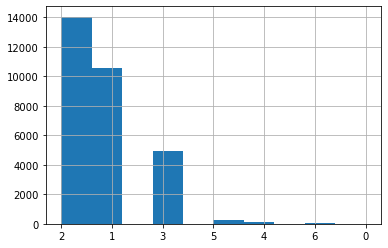

In [126]:
hist = data['EDUCATION'].hist()

# Afficher une pie qui compare l'age

<AxesSubplot:ylabel='SEX'>

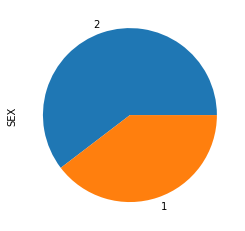

In [127]:
data['SEX'].value_counts().plot.pie()

 # Afficher une pie qui compare notre default_payment_next_month


<AxesSubplot:ylabel='default_payment_next_month'>

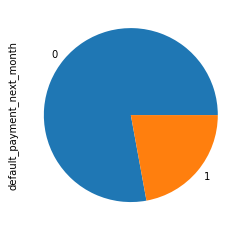

In [128]:
data['default_payment_next_month'].value_counts().plot.pie()

# afficher un histogramme qui compare le mariage


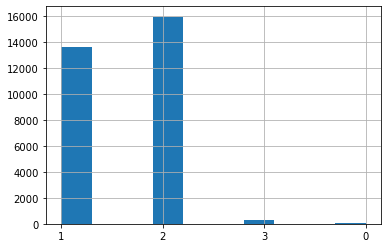

In [129]:
hist = data['MARRIAGE'].hist()

# tester la linéariter de pay_amt avec bill_amt

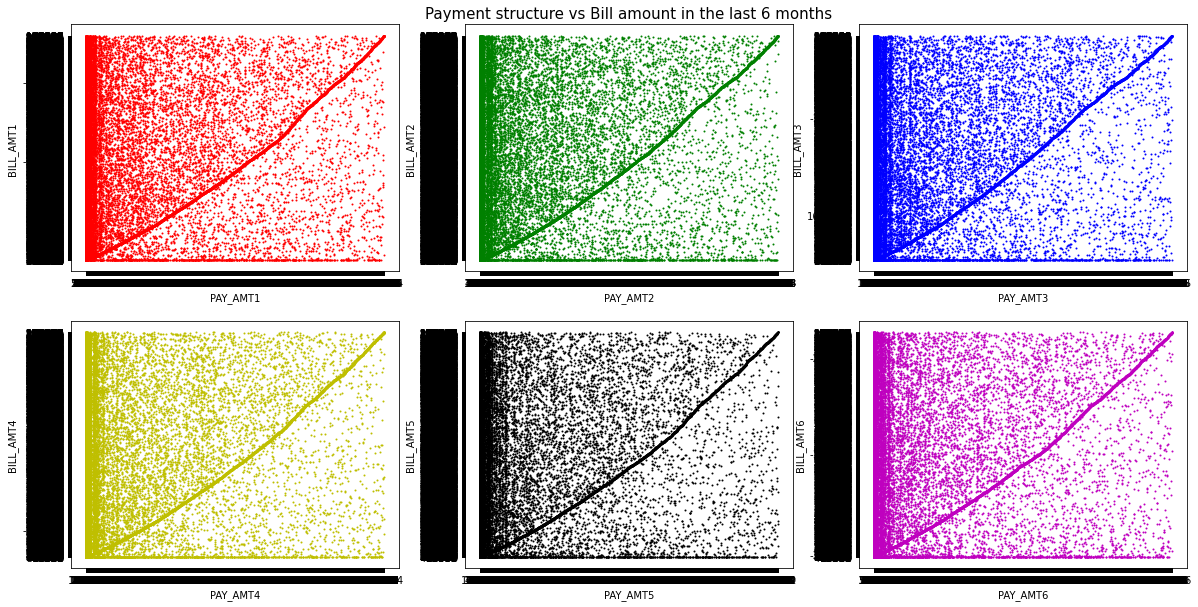

In [130]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=data.PAY_AMT1, y=data.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=data.PAY_AMT2, y=data.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=data.PAY_AMT3, y=data.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=data.PAY_AMT4, y=data.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=data.PAY_AMT5, y=data.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=data.PAY_AMT6, y=data.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

# mettre en evudence la difference entre l'histogramme de default_payment_next_month ey LIMIT_BAL

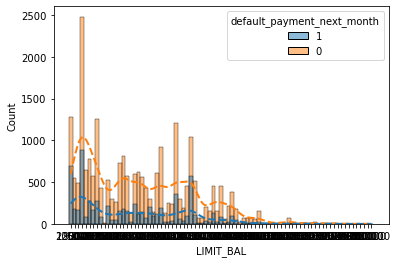

In [131]:
sns.histplot(data=data, x='LIMIT_BAL', hue='default_payment_next_month', 
             kde=True, line_kws={'ls':'--', 'lw':2})
plt.show()

In [15]:
di.display_html("""
<table id="customers">
    <thead class="first">
        <th colspan=5>Table of contents</th>
    <tbody>
        <tr>
            <td colspan=5 class="cell"><a href='#Importation-des-dependance '>I.Business understanding </a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Decrire-le-dataset'>II.Data understanding</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Transformer-les-objects-de-notre-dataset-en-int'>III.Data preparation</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#supprimer-le-valeure-supperieure-aux-le-maximum-et-inferieur-aux-minimum-a-10%-prés
'>IV.Modeling</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Pre-processing-:'>V.Evaluation</a></td>
        </tr>
    </tbody>
</table>
""", raw=True)

I.Business understanding
II.Data understanding
III.Data preparation
IV.Modeling
V.Evaluation


# <font color=green> III. Data preparation 

##### <font color=green>Organiser les données pour la modélisation

# Transformer les objects de notre dataset en int 

In [132]:
data=data.astype(int)
data.dtypes

LIMIT_BAL                     int32
SEX                           int32
EDUCATION                     int32
MARRIAGE                      int32
AGE                           int32
PAY_0                         int32
PAY_2                         int32
PAY_3                         int32
PAY_4                         int32
PAY_5                         int32
PAY_6                         int32
BILL_AMT1                     int32
BILL_AMT2                     int32
BILL_AMT3                     int32
BILL_AMT4                     int32
BILL_AMT5                     int32
BILL_AMT6                     int32
PAY_AMT1                      int32
PAY_AMT2                      int32
PAY_AMT3                      int32
PAY_AMT4                      int32
PAY_AMT5                      int32
PAY_AMT6                      int32
default_payment_next_month    int32
dtype: object

# afficher la mediane et les quartilles 

In [133]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


# tester si notre data set comporte des lignes dupliquées 

In [134]:
data.duplicated().any()

True

# supprimer les duplicate  

In [135]:
data=data.drop_duplicates()
data.shape

(29965, 24)

# retester si notre dataset a encore des duplicate

In [136]:
data.duplicated().any()

False

# tester si notre dataset comporte des valeurs nulles

In [137]:
data.isna().sum().value_counts()

0    24
dtype: int64

# afficher les colonnes de notre dataset

In [138]:
data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default_payment_next_month'],
      dtype='object')

# voir les valeur unique de SEX,EDUCATION,PAY_0,MARRIAGE,default_payment_next_month

In [139]:
print('Sex', data.SEX.unique())
print('Education', data.EDUCATION.unique())
print('Pay_0', data.PAY_0.unique())
print('Marriage', data.MARRIAGE.unique())
print('Default', data.default_payment_next_month.unique())

Sex [2 1]
Education [2 1 3 5 4 6 0]
Pay_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
Marriage [1 2 3 0]
Default [1 0]


# transformer les 0,5,6 en 4 car ils representent la même chose

In [140]:
data['EDUCATION'] = np.where(data['EDUCATION']<5, data['EDUCATION'], 4)
data['EDUCATION'] = np.where(data['EDUCATION']!=0, data['EDUCATION'], 4)
data['EDUCATION'].value_counts()


2    14019
1    10563
3     4915
4      468
Name: EDUCATION, dtype: int64

In [141]:
print('Education', data.EDUCATION.unique())


Education [2 1 3 4]


# affiche la boxplot de notre dataset

<AxesSubplot:>

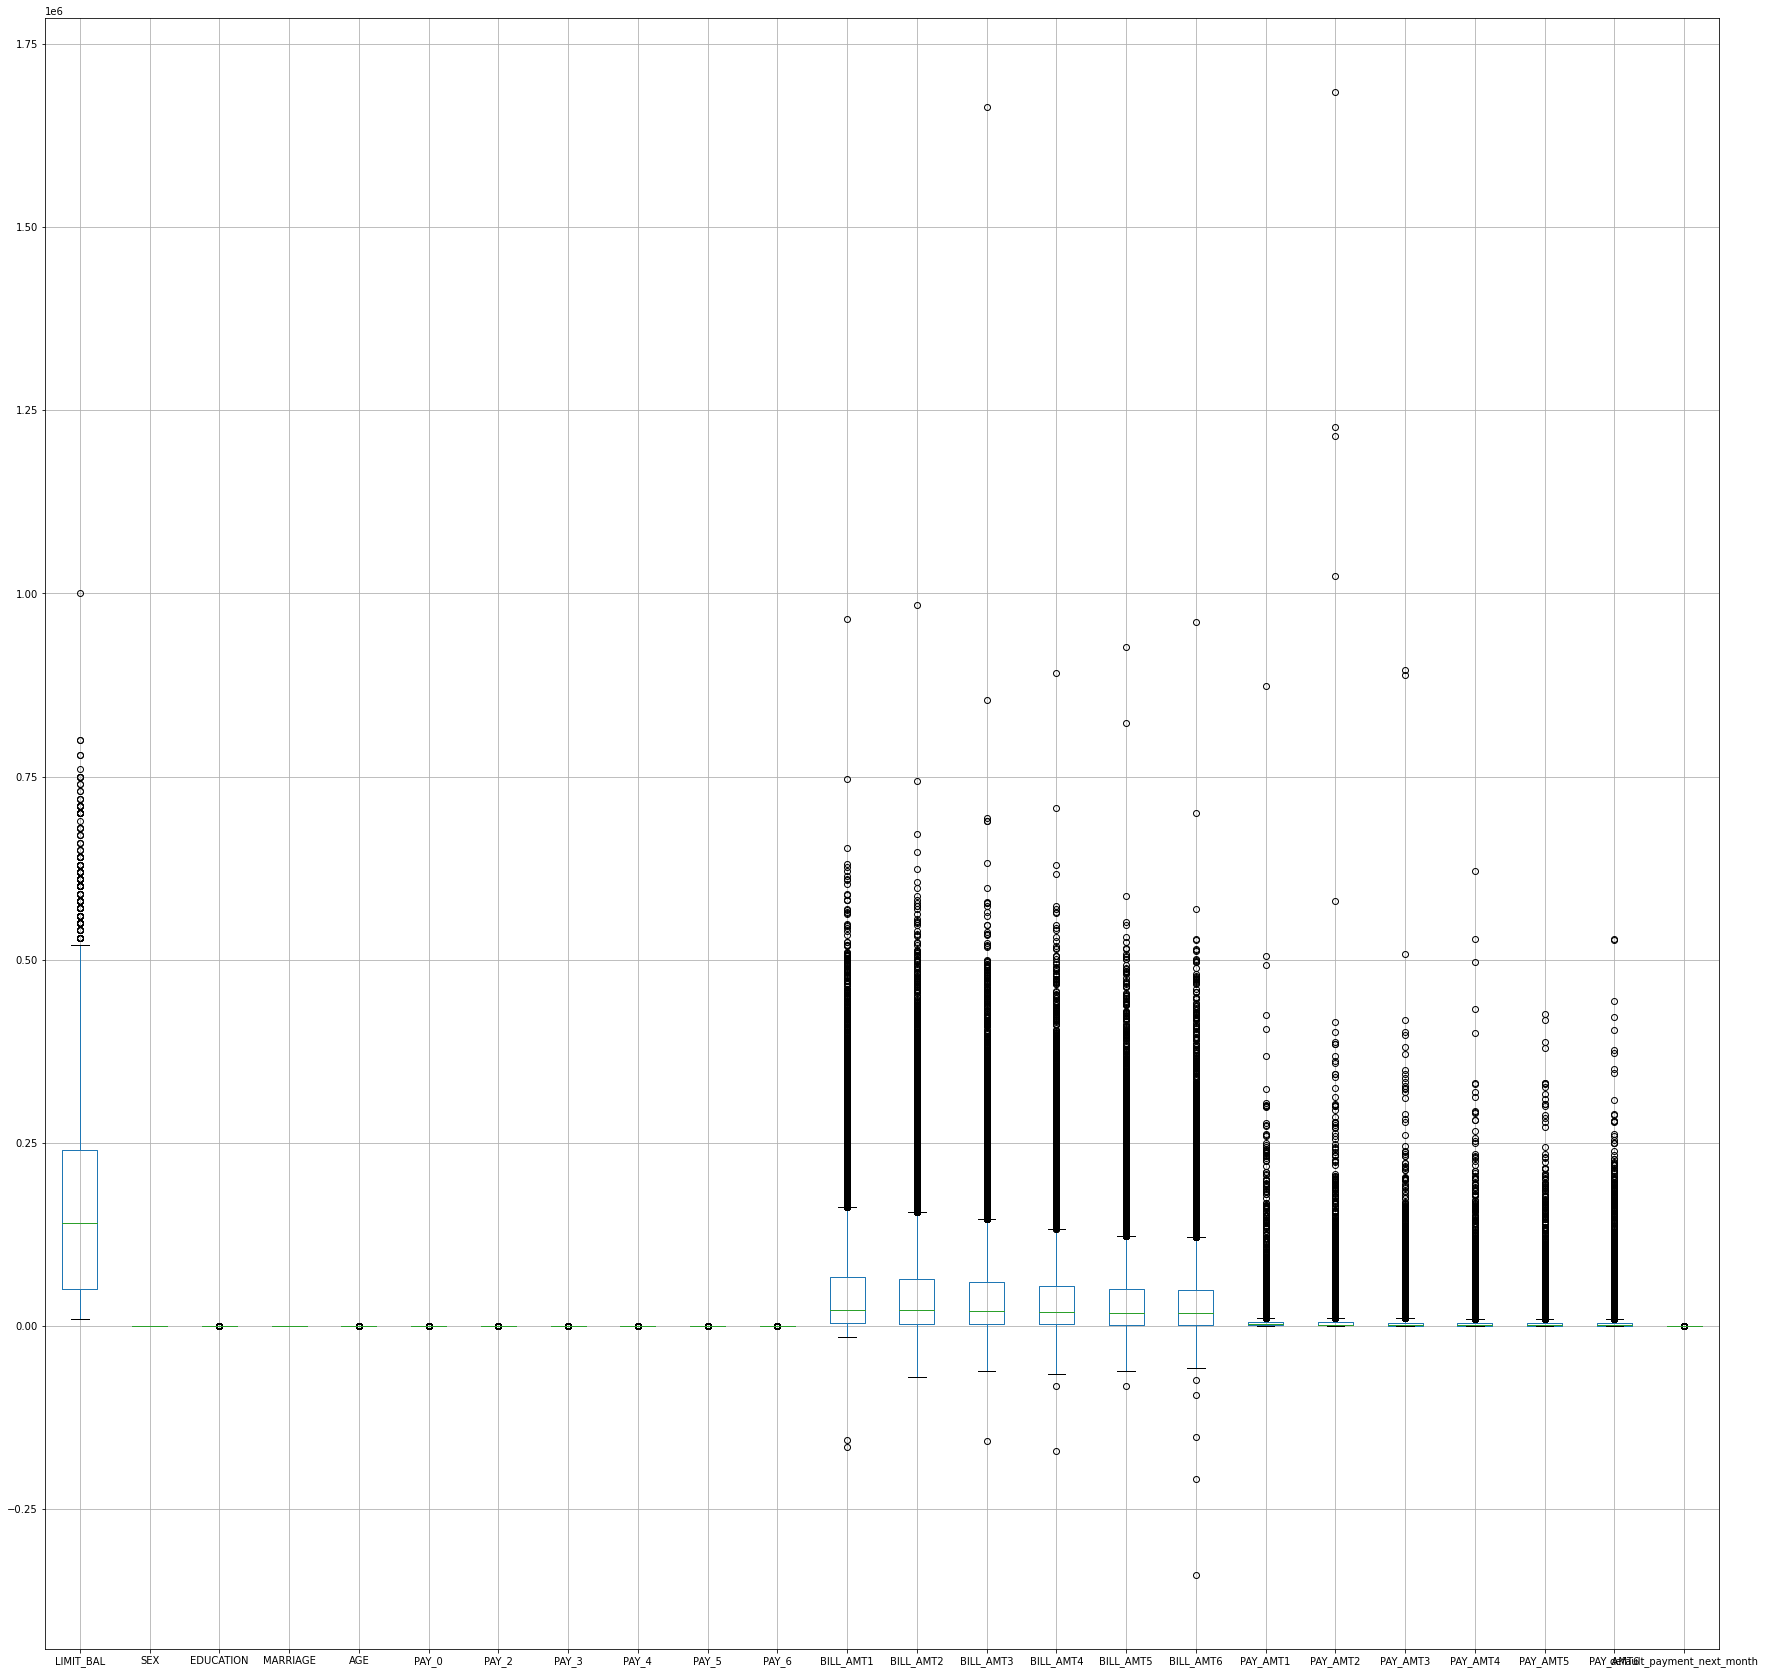

In [142]:
data.boxplot(figsize=(30,30))

In [18]:
di.display_html("""
<table id="customers">
    <thead class="first">
        <th colspan=5>Table of contents</th>
    <tbody>
        <tr>
            <td colspan=5 class="cell"><a href='#Importation-des-dependance '>I.Business understanding </a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Decrire-le-dataset'>II.Data understanding</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Transformer-les-objects-de-notre-dataset-en-int'>III.Data preparation</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#supprimer-le-valeure-supperieure-aux-le-maximum-et-inferieur-aux-minimum-a-10%-prés
'>IV.Modeling</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Pre-processing-:'>V.Evaluation</a></td>
        </tr>
    </tbody>
</table>
""", raw=True)

I.Business understanding
II.Data understanding
III.Data preparation
IV.Modeling
V.Evaluation


# <font color=green>IV. Modeling 
###### <font color=green>Expliquer et justifier le choix, le paramétrage et le test de différents algorithmes 

# supprimer la valeure supperieure aux maximum et inferieur aux minimum a 10% près

In [143]:
# Pour la colonne LIMIT_BAL:
q1 = data['LIMIT_BAL'].quantile(0.10)
q3 = data['LIMIT_BAL'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df2= data[(data['LIMIT_BAL'] > fence_low) & (data['LIMIT_BAL'] < fence_high)]
df2


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [144]:
# Pour la colonne AGE:
q1 = df2['AGE'].quantile(0.10)
q3 = df2['AGE'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df3= df2[(df2['AGE'] > fence_low) & (df2['AGE'] < fence_high)]
df3

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [145]:
#la colonne EDUCATION:
q1 = df3['EDUCATION'].quantile(0.10)
q3 = df3['EDUCATION'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df4= df3[(df3['EDUCATION'] > fence_low) & (df3['EDUCATION'] < fence_high)]
df4

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [146]:
#la colonne MARRIAGE:
q1 = df4['MARRIAGE'].quantile(0.10)
q3 = df4['MARRIAGE'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df5= df4[(df4['MARRIAGE'] > fence_low) & (df4['MARRIAGE'] < fence_high)]
df5


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [147]:
#la colonne PAY_0:
q1 = df5['PAY_0'].quantile(0.10)
q3 = df5['PAY_0'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df6= df5[(df5['PAY_0'] > fence_low) & (df5['PAY_0'] < fence_high)]
df6

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [148]:
#la colonne PAY_2:
q1 = df6['PAY_2'].quantile(0.10)
q3 = df6['PAY_2'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df7= df6[(df6['PAY_2'] > fence_low) & (df6['PAY_2'] < fence_high)]

df7

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [149]:
#la colonne PAY_3:
q1 = df7['PAY_3'].quantile(0.10)
q3 = df7['PAY_3'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df8= df7[(df7['PAY_3'] > fence_low) & (df7['PAY_3'] < fence_high)]

df8

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [150]:
#la colonne PAY_4:
q1 = df8['PAY_4'].quantile(0.10)
q3 = df8['PAY_4'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df9= df8[(df8['PAY_4'] > fence_low) & (df8['PAY_4'] < fence_high)]
df9


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [151]:
#la colonne PAY_5:
q1 = df9['PAY_5'].quantile(0.10)
q3 = df9['PAY_5'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df10= df9[(df9['PAY_5'] > fence_low) & (df9['PAY_5'] < fence_high)]
df10

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [152]:
#la colonne PAY_6:
q1 = df10['PAY_6'].quantile(0.10)
q3 = df10['PAY_6'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df11= df10[(df10['PAY_6'] > fence_low) & (df10['PAY_6'] < fence_high)]
df11


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [153]:
#la colonne BILL_AMT1:
q1 = df11['BILL_AMT1'].quantile(0.20)
q3 = df11['BILL_AMT1'].quantile(0.80)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df12= df11[(df11['BILL_AMT1'] > fence_low) & (df11['BILL_AMT1'] < fence_high)]
df12



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [154]:
#la colonne BILL_AMT2:
q1 = df12['BILL_AMT2'].quantile(0.10)
q3 = df12['BILL_AMT2'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df13= df12[(df12['BILL_AMT2'] > fence_low) & (df12['BILL_AMT2'] < fence_high)]
df13


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [155]:
#la colonne BILL_AMT3:
q1 = df13['BILL_AMT3'].quantile(0.10)
q3 = df13['BILL_AMT3'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df14= df13[(df13['BILL_AMT3'] > fence_low) & (df13['BILL_AMT3'] < fence_high)]
df14

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [156]:
#la colonne BILL_AMT4:
q1 = df14['BILL_AMT4'].quantile(0.10)
q3 = df14['BILL_AMT4'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df15= df14[(df14['BILL_AMT4'] > fence_low) & (df14['BILL_AMT4'] < fence_high)]
df15


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [157]:
#la colonne BILL_AMT5:
q1 = df15['BILL_AMT5'].quantile(0.10)
q3 = df15['BILL_AMT5'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df16= df15[(df15['BILL_AMT5'] > fence_low) & (df15['BILL_AMT5'] < fence_high)]
df16


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [158]:
#la colonne BILL_AMT6:
q1 = df16['BILL_AMT6'].quantile(0.10)
q3 = df16['BILL_AMT6'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df17= df16[(df16['BILL_AMT6'] > fence_low) & (df16['BILL_AMT6'] < fence_high)]
df17

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [159]:
#la colonne PAY_AMT1:
q1 = df17['PAY_AMT1'].quantile(0.10)
q3 = df17['PAY_AMT1'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df18= df17[(df17['PAY_AMT1'] > fence_low) & (df17['PAY_AMT1'] < fence_high)]
df18


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [160]:
#la colonne PAY_AMT2:
q1 = df18['PAY_AMT2'].quantile(0.10)
q3 = df18['PAY_AMT2'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df19= df18[(df18['PAY_AMT2'] > fence_low) & (df18['PAY_AMT2'] < fence_high)]

df19

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1


In [161]:
#la colonne PAY_AMT3:
q1 = df19['PAY_AMT3'].quantile(0.10)
q3 = df19['PAY_AMT3'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df20= df19[(df19['PAY_AMT3'] > fence_low) & (df19['PAY_AMT3'] < fence_high)]
df20

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0


In [162]:
#la colonne PAY_AMT4 :
q1 = df20['PAY_AMT4'].quantile(0.05)
q3 = df20['PAY_AMT4'].quantile(0.95)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df21= df20[(df20['PAY_AMT4'] > fence_low) & (df20['PAY_AMT4'] < fence_high)]
df21



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0


In [163]:
#la colonne PAY_AMT5:
q1 = df21['PAY_AMT5'].quantile(0.05)
q3 = df21['PAY_AMT5'].quantile(0.95)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df22= df21[(df21['PAY_AMT5'] > fence_low) & (df21['PAY_AMT5'] < fence_high)]
df22



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0


In [164]:
#la colonne PAY_AMT6:
q1 = df22['PAY_AMT6'].quantile(0.05)
q3 = df22['PAY_AMT6'].quantile(0.95)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df23= df22[(df22['PAY_AMT6'] > fence_low) & (df22['PAY_AMT6'] < fence_high)]
df23


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0


In [165]:
#la colonne default_payment:
q1 = df23['default_payment_next_month'].quantile(0.10)
q3 = df23['default_payment_next_month'].quantile(0.90)
iqr = q3-q1 
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
df24= df23[(df23['default_payment_next_month'] > fence_low) & (df23['default_payment_next_month'] < fence_high)]


df24


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
6,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,10000,1,3,1,43,0,0,0,-2,-2,...,0,0,0,2000,0,0,0,0,0,0
29995,80000,1,2,2,34,2,2,2,2,2,...,77519,82607,81158,7000,3500,0,7000,0,4000,1
29996,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0


# Afficher la correlation avant et après le nettoyage du dataset

<AxesSubplot:>

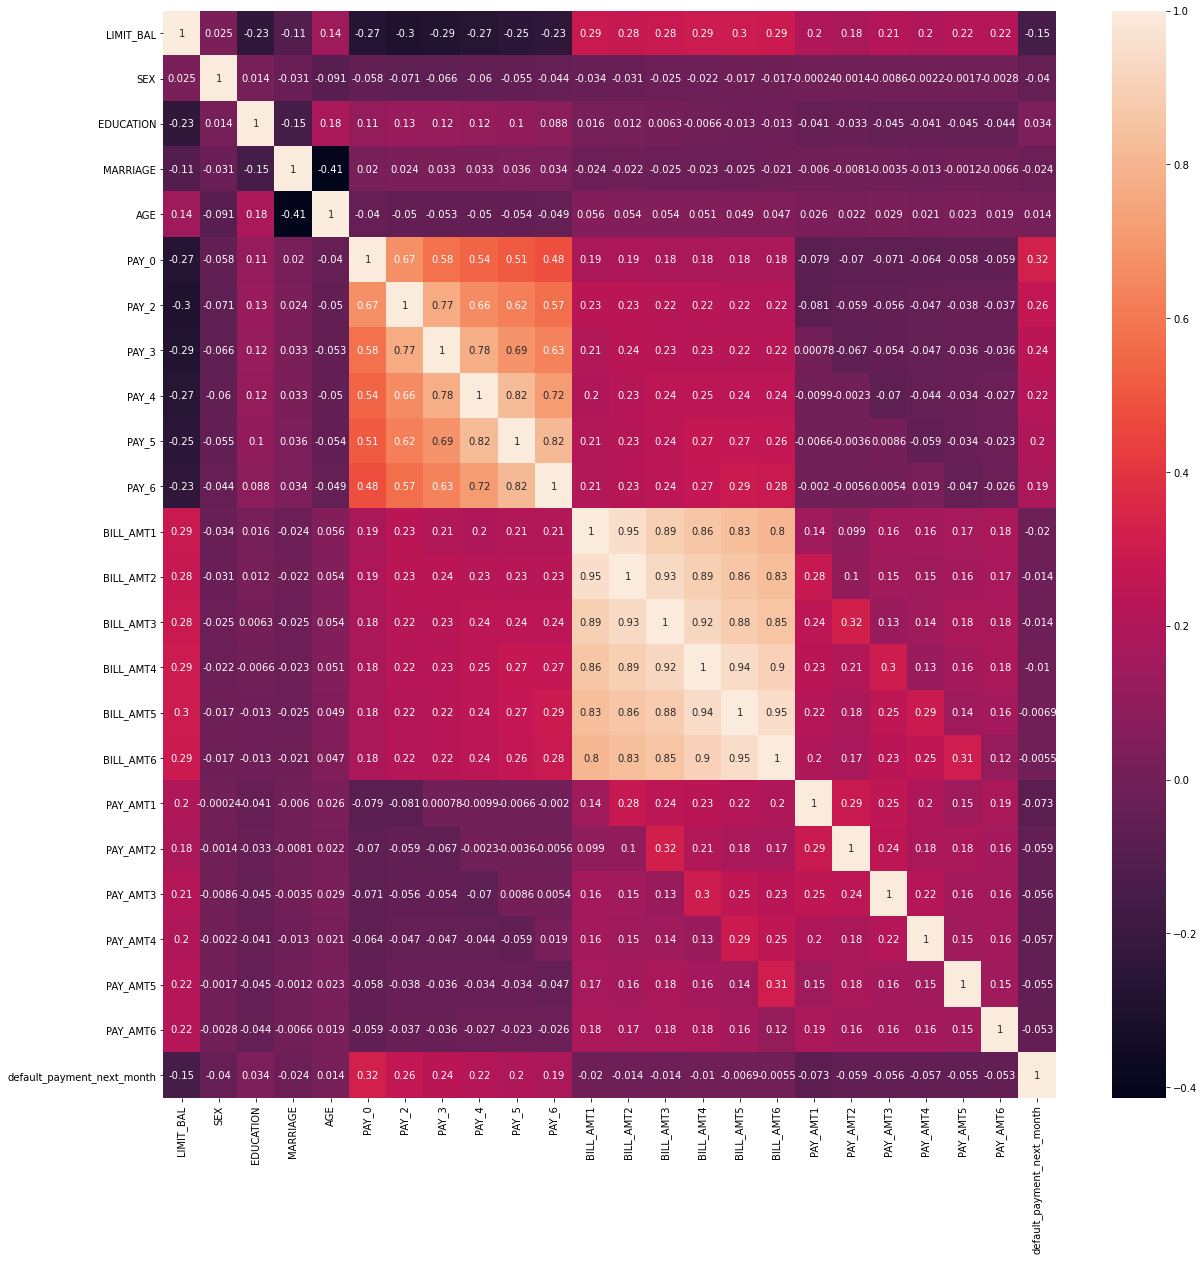

In [166]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

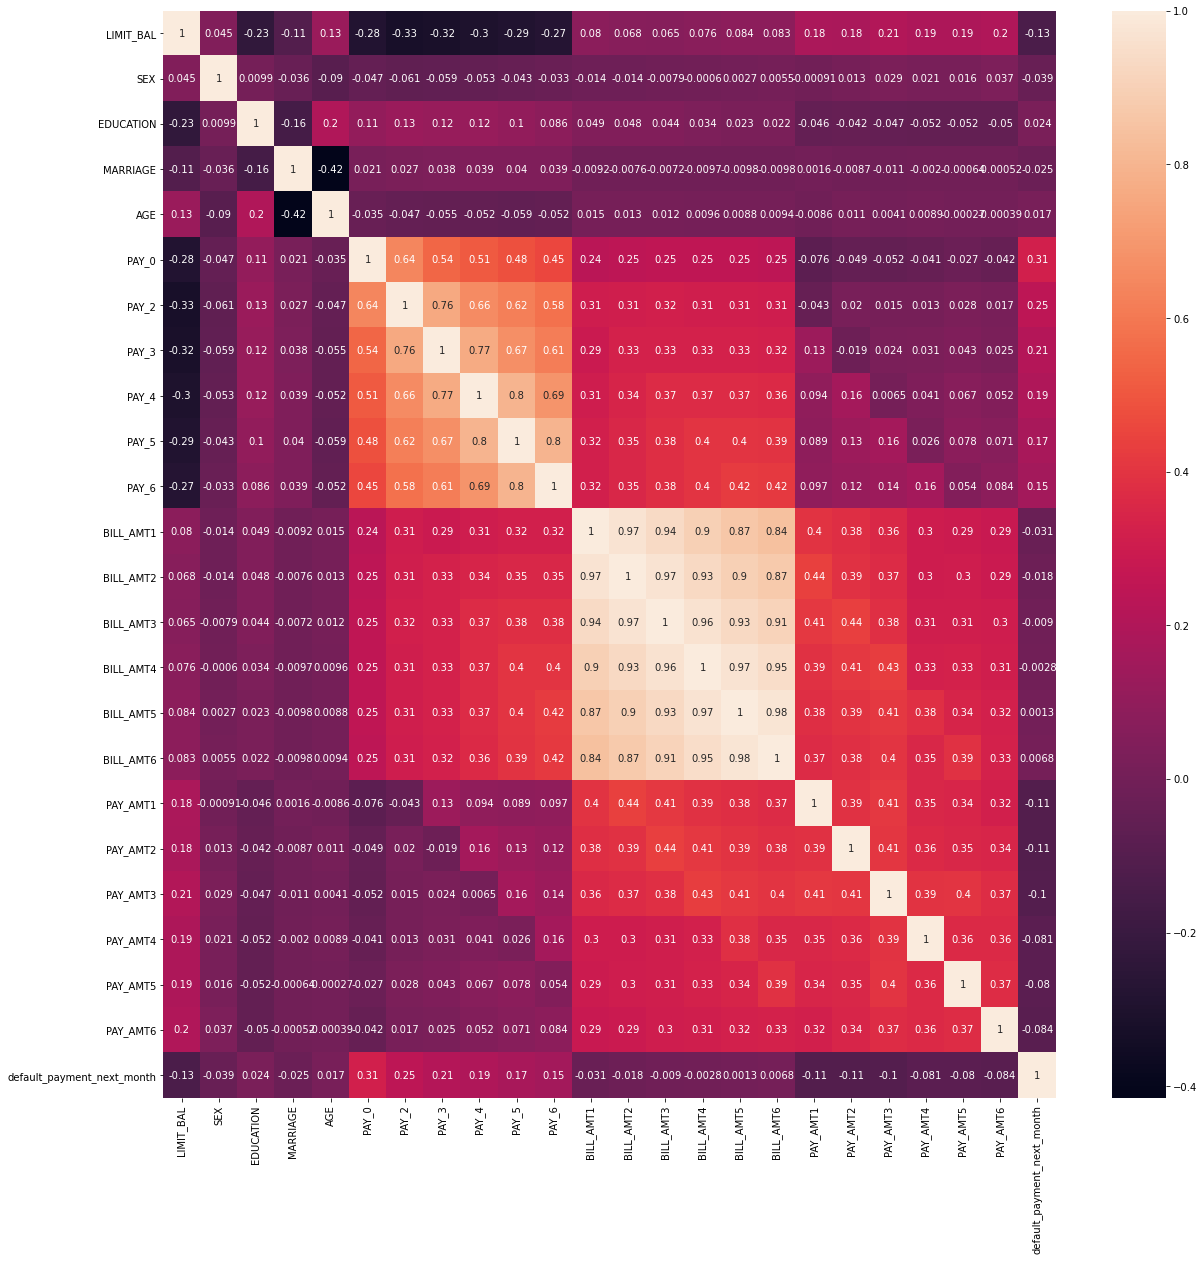

In [167]:
import seaborn as sns

plt.figure(figsize=(20,20))
sns.heatmap(df24.corr(), annot=True)

# retester la linéarite entre PAY_AMT1 et BILL_AMT2

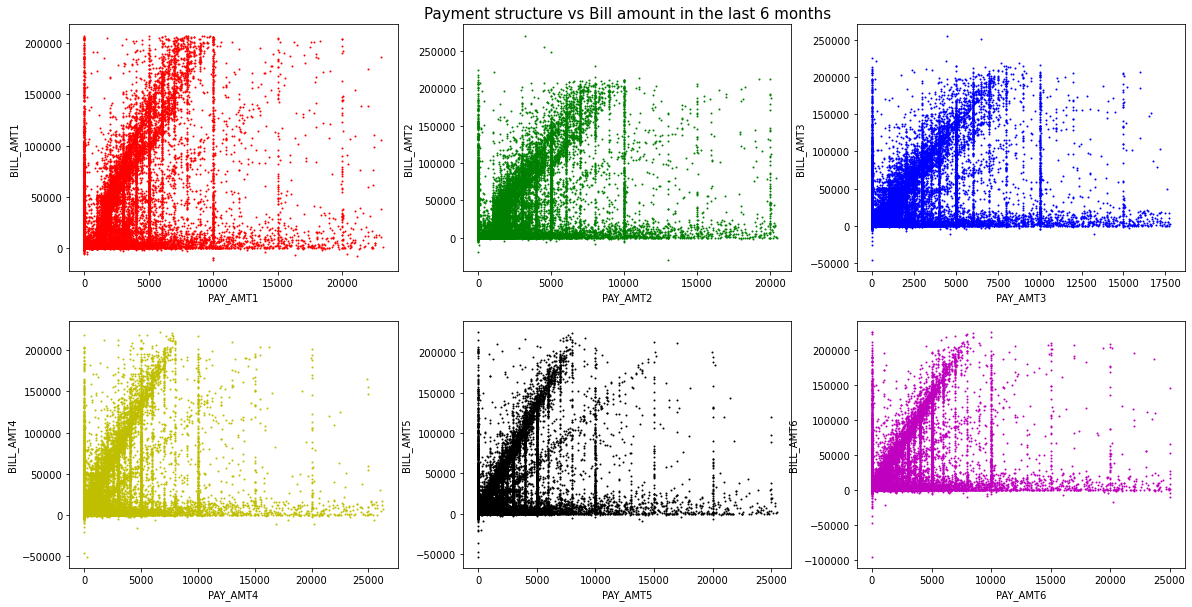

In [168]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df24.PAY_AMT1, y=df24.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df24.PAY_AMT2, y=df24.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Payment structure vs Bill amount in the last 6 months', fontsize=15)

plt.subplot(233)
plt.scatter(x=df24.PAY_AMT3, y=df24.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df24.PAY_AMT4, y=df24.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df24.PAY_AMT5, y=df24.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df24.PAY_AMT6, y=df24.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

In [3]:
di.display_html("""
<table id="customers">
    <thead class="first">
        <th colspan=5>Table of contents</th>
    <tbody>
        <tr>
            <td colspan=5 class="cell"><a href='#Importation-des-dependance '>I.Business understanding </a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Decrire-le-dataset'>II.Data understanding</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Transformer-les-objects-de-notre-dataset-en-int'>III.Data preparation</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#supprimer-le-valeure-supperieure-aux-le-maximum-et-inferieur-aux-minimum-a-10%-prés'>IV.Modeling</a></td>
        </tr>
        <tr>
            <td colspan=5 class="cell"><a href='#Pre-processing-:'>V.Evaluation</a></td>
        </tr>
    </tbody>
</table>
""", raw=True)

I.Business understanding
II.Data understanding
III.Data preparation
IV.Modeling
V.Evaluation


# <font color=green>V. Evaluation
###### <font color=green> Vérifier le(s) modèle(s) ou les connaissances obtenues afin de s’assurer qu’ils répondent aux objectifs formulés au début du processus.


 ### Pre-processing :


# On commence par la division de la dataset en X et Y 


In [206]:
X=df24[df24.columns[:-1]]
y=df24['default_payment_next_month']
y=y.astype('int')

division en test et train , le test comptant 20% de la dataset

In [172]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=1, stratify = y)

In [173]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [174]:
df24['default_payment_next_month'].value_counts(normalize= True) 

0    0.766768
1    0.233232
Name: default_payment_next_month, dtype: float64

# Normalisons la dataset


In [175]:
def min_max_scaling(X):
    X_norm = X.copy()
    for column in X_norm.columns:
        X_norm[column] = (X_norm[column] - X_norm[column].min()) / (X_norm[column].max() - X_norm[column].min()) 
    return X_norm
X_normalized = min_max_scaling(X)
X_normalized

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
1,0.012987,1.0,0.333333,0.333333,0.055556,0.500,0.571429,0.166667,0.2,0.0,...,0.155034,0.185590,0.190653,0.295822,0.000000,0.033659,0.000000,0.000000,0.000000,0.000000
2,0.142857,1.0,0.333333,0.666667,0.092593,0.125,0.571429,0.333333,0.4,0.5,...,0.161634,0.197587,0.203080,0.306017,0.000000,0.048852,0.056167,0.038097,0.000000,0.079777
3,0.103896,1.0,0.333333,0.666667,0.240741,0.250,0.285714,0.333333,0.4,0.5,...,0.197653,0.238137,0.244418,0.344433,0.065564,0.073278,0.056167,0.038097,0.039283,0.199442
4,0.051948,1.0,0.333333,0.333333,0.296296,0.250,0.285714,0.333333,0.4,0.5,...,0.315982,0.289407,0.294812,0.388194,0.086382,0.098632,0.067401,0.041906,0.041994,0.039888
6,0.051948,0.0,0.000000,0.666667,0.296296,0.250,0.285714,0.333333,0.4,0.5,...,0.343524,0.256701,0.261218,0.358423,0.107977,0.088666,0.036902,0.038097,0.039283,0.031911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29993,0.000000,0.0,0.666667,0.333333,0.407407,0.250,0.285714,0.333333,0.0,0.0,...,0.152752,0.185590,0.190653,0.295822,0.086382,0.000000,0.000000,0.000000,0.000000,0.000000
29995,0.090909,0.0,0.333333,0.666667,0.240741,0.500,0.571429,0.666667,0.8,1.0,...,0.415636,0.469824,0.487771,0.549543,0.302337,0.170982,0.000000,0.266677,0.000000,0.159553
29996,0.272727,0.0,0.666667,0.333333,0.333333,0.250,0.285714,0.333333,0.4,0.5,...,0.842764,0.508268,0.303005,0.345780,0.367123,0.977040,0.281004,0.116081,0.196417,0.039888
29997,0.181818,0.0,0.666667,0.666667,0.407407,0.125,0.142857,0.166667,0.2,0.5,...,0.164349,0.218513,0.209321,0.295822,0.079342,0.172252,0.505392,0.004914,0.000000,0.000000


#  <font color=blue>Test des modèles et prédiction.

# <font color=red>Methodes simples:

# SVM :


# Test de la methode SVM:


In [178]:
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [179]:
from sklearn.metrics import classification_report
y_pred_svc_1 = svm.predict(X_test)
print(classification_report(y_pred_svc_1, y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2126
           1       0.35      0.73      0.47       270

    accuracy                           0.82      2396
   macro avg       0.66      0.78      0.68      2396
weighted avg       0.89      0.82      0.84      2396



# La méthode SVM a donné 0.8200 comme accuracy (plus ou moins un bon modèle mais on va tester les autres modèles et on verra)

# KNN :

In [182]:
from sklearn.neighbors import KNeighborsClassifier
error = []
for i in range(1, 40):
    knn = KNeighborsClassifier(i,metric='manhattan')
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    # Append: add an object to the end of the list
   # mean:
knn = KNeighborsClassifier(22)
knn_model = knn.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn.score(X_test, y_test) 

0.7988313856427379

# Arbre De Décision:


In [183]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
#Calculer les scores d'apprentissage et de test relatifs au modèle dt
print('Le train score est :', dt.score(X_train, y_train))
print('Le test score est :', dt.score(X_test, y_test))


Le train score est : 0.999257988220563
Le test score est : 0.7228714524207012


In [184]:
from sklearn.metrics import confusion_matrix
y_pred = dt.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[1485  352]
 [ 312  247]]


# Afficher la matrice de confusion

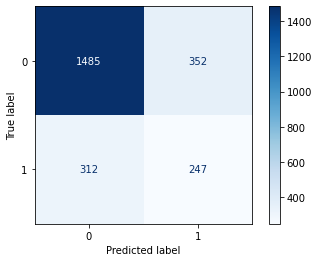

In [185]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

In [186]:
from sklearn.metrics import classification_report
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred, digits=8,  ))

              precision    recall  f1-score   support

           0  0.82637730 0.80838323 0.81728123      1837
           1  0.41235392 0.44186047 0.42659758       559

    accuracy                      0.72287145      2396
   macro avg  0.61936561 0.62512185 0.62193941      2396
weighted avg  0.72978336 0.72287145 0.72613258      2396



# Feature importance


In [187]:
dt.feature_importances_

array([0.05810964, 0.01224878, 0.02469328, 0.01400773, 0.08630261,
       0.1516445 , 0.03206834, 0.00988862, 0.00756274, 0.01226528,
       0.00610816, 0.0712224 , 0.05131388, 0.03567977, 0.04274485,
       0.0413416 , 0.04433046, 0.05837529, 0.04650123, 0.06010517,
       0.03887651, 0.0413991 , 0.05321006])

In [188]:
X.keys()

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [189]:
names=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for var, importance in zip(names, dt.feature_importances_):
    if importance != 0:
        print(var, importance)

LIMIT_BAL 0.05810964093195766
SEX 0.012248775990237468
EDUCATION 0.024693278860857624
MARRIAGE 0.01400773473233283
AGE 0.08630261142501922
PAY_0 0.1516445033061945
PAY_2 0.032068335904386215
PAY_3 0.009888621912561341
PAY_4 0.007562737894332748
PAY_5 0.012265281867550213
PAY_6 0.006108161173483939
BILL_AMT1 0.07122239949984452
BILL_AMT2 0.05131388039573889
BILL_AMT3 0.03567977147684545
BILL_AMT4 0.04274485113253024
BILL_AMT5 0.04134159578307474
BILL_AMT6 0.04433045748557895
PAY_AMT1 0.058375287723151495
PAY_AMT2 0.04650123396658381
PAY_AMT3 0.06010517214888616
PAY_AMT4 0.038876513712194666
PAY_AMT5 0.04139909632438136
PAY_AMT6 0.05321005635227587


Afficher l'arbre de décision :


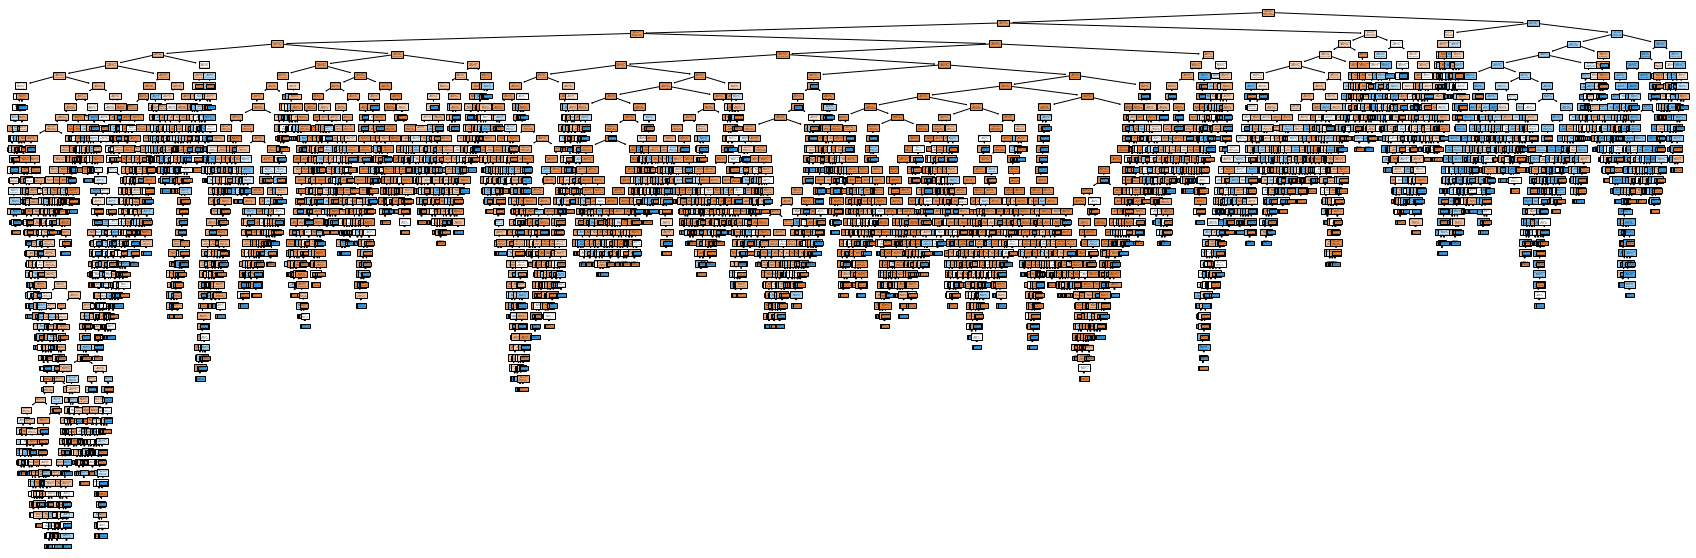

In [190]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
plot_tree(dt, feature_names= names, filled=True)
plt.show()

In [191]:
#Charger la méthode GridSearchCV
from sklearn.model_selection import GridSearchCV
#Créer une instance final_model de l'algorithme de classification par arbres de décision en utilisant les meilleurs hyperparamètres
final_model = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=6)
#Entrainer final_model sur le sous-ensemble de données approprié.
final_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)

# Evaluer la performance de final_model sur le sous-ensemble de données approprié


In [192]:
print( 'le train_score=',final_model.score(X_train, y_train))
print( 'le test_score=',final_model.score(X_test, y_test))


le train_score= 0.8151463154477577
le test_score= 0.8105175292153589


 # tracer la matrice de confusion de final_model


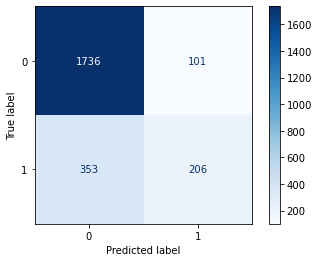

In [193]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(final_model, X_test, y_test, cmap=plt.cm.Blues)
plt.show()

# Afficher le classification_report de final_model


In [194]:
from sklearn.metrics import classification_report
y_pred = final_model.predict(X_test)

print(classification_report(y_test, y_pred, digits=8 ))


              precision    recall  f1-score   support

           0  0.83101963 0.94501905 0.88436067      1837
           1  0.67100977 0.36851521 0.47575058       559

    accuracy                      0.81051753      2396
   macro avg  0.75101470 0.65676713 0.68005562      2396
weighted avg  0.79368845 0.81051753 0.78902969      2396



# Afficher l'arbre de décision de final_model et le compararer à celui de la première partie.


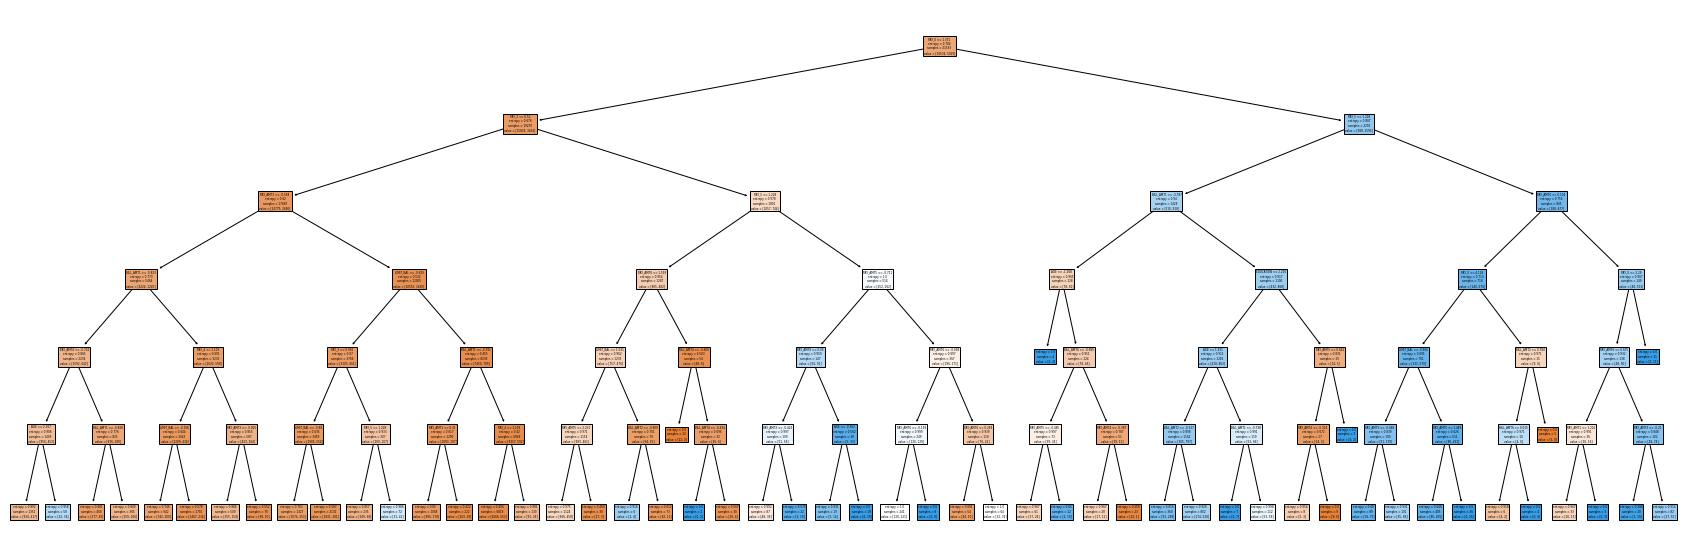

In [195]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,10))
plot_tree(final_model, feature_names= names, filled=True)
plt.savefig("tree.png")
plt.show()

# <font color=red>Méthodes Ensemblistes:

# Deux familles de méthodes ensemblistes ont été proposées: Bagging(corrgier l’instabilité des arbres de décision) & Boosting

# RandomForest : (BAGGING)


# randomforest score :


In [198]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=500,random_state=42, n_jobs=-1)

rf_model.fit(X_train, y_train)
y_pred_rfc = rf_model.predict(X_test)
score_rfc=accuracy_score(y_pred_rfc,y_test)*100
print("RandomForestClassifier SCORE:{:.3f}".format(score_rfc))

RandomForestClassifier SCORE:81.594


# AdaBoost (BOOSTING)


In [199]:
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8134390651085142


 ## <font color=red> Régression Logistique :


In [200]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8046744574290484

In [201]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.7967812437909796


In [202]:
data_coef = pd.DataFrame(model.coef_, columns=X_train.columns)
data_coef
model.coef_

array([[-0.03639058, -0.05937693, -0.07361199, -0.08246147,  0.04685627,
         0.5998178 ,  0.10873855,  0.05386361,  0.09091606,  0.0537868 ,
        -0.026028  , -0.56019986,  0.15729236,  0.25069378,  0.00639322,
        -0.28412721,  0.40400414, -0.1326306 , -0.17866662, -0.11831812,
        -0.00539285, -0.10265723, -0.08435057]])

In [203]:
predictions = model.predict(X_test)
predictions

array([0, 1, 0, ..., 0, 0, 0])

# compare predicted values with the actual scores


In [204]:
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
compare_df

,actual,predicted
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0
...,...,...
2391,0,0
2392,0,0
2393,0,0
2394,1,0


In [205]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      1837
           1       0.72      0.27      0.39       559

    accuracy                           0.80      2396
   macro avg       0.77      0.62      0.64      2396
weighted avg       0.79      0.80      0.77      2396



# <font color=grey> Aprés avoir tester les 5 modèles on a constaté que le modèle SVM a donné une accuracy meilleure. (0.8200) 


#  <font color=red>MERCI MADAME POUR VOTRE ATTENTION